In [1]:
# Import python packages numpy, matplotlib, and pulp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pulp

# CEE 201: Linear Programming with Jupyter Notebooks

## Example3-1: Homewood Masonry-A Materials Production Problem

### Problem Statement

Homewood Masonry is a small owner-operated firm that produces construction materials for the residential and commercial construction industry in the region. TI1e company specializes in the manufacture of two widely used building products: (1) a universal concrete patching product called HYDIT and (2) a decorative brick mortar called FILIT. These products are in great demand and Homewood can sell all of the HYDIT it produces for a profit of 140 dollars per ton and all the FILIT it can produce for a profit of 160 dollars per ton.

Unfortunately, some of the resources needed to manufacture these products are in limited supply. First, the demand for both HYDIT and FILIT is due in large part to their special adhesive characteristics, which result from the use of a special
ingredient in the blending process-Wabash Red Clay (from the banks of the
Wabash River in Indiana). Each ton of HYDIT produced requires 2 cubic meters of
this red clay, and each ton of FILIT produced requires 4 cubic meters.

Wabash Red Clay is in limited supply; a maximum of 28 cubic meters of the clay is available each week. Second, the operator of the machine used to blend these
products can work only a maximum of 50 hours per week. This machine blends a ton
of either product at a time. and the blending process requires 5 hours to complete.
Last, each material must be stored in a separate curing vat, further limiting the over
all production volume of each product. The curing vats for HYDIT and FILIT have
capacities of 8 and 6 tons, respectively. These resource limitations are summarized below.

| Resource      | HYDIT $(x_1)$      | FILIT $(x_2)$      | Available    |
|----------------|----------------|----------------|----------------|
| Wabash Red Clay     |  2 $m^3/ton$  |  4 $m^3/ton$     | 28 $m^3/wk$|
| Blending time| 5 hr/ton  | 5 hr/ton  | 50 hr/wk  |
| Curing vat capacity | 8 tons | 6 tons|   |
| Profit | \$140 |\$160 | |

#### What is the optimal production strategy for Homewood Masonry given these data?

### Objective Function & Constraints
#### Maximizing total profit
$Z=140x_1+160x_2$

#### Production costraints
* Maximum Wabash Red Clay per week \
$2x_1+4x_2\leq 28$
* Maximum work hour per week is 50 \
$5x_1+5x_2\leq 50$
* Curing vat capacity for HYDIT is at most:  \
$x_1\leq 8$
* Curing vat capacity for FILIT is at most: \
$x_2\leq 6$
* Production cannot be negative \
$x_1 \geq 0$, 
$x_2 \geq 0$

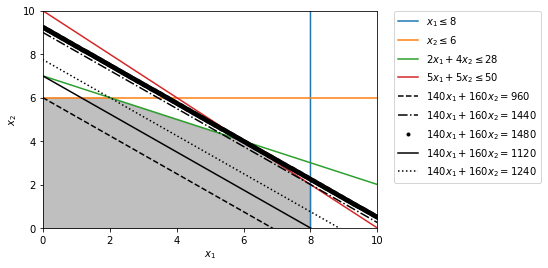

In [3]:
# Construct lines
# x1 > 0
x = np.linspace(0, 20, 2000)
y = np.linspace(0, 20, 2000)
# x1 <= 8
x1 = (y*0) + 8
# x2 <= 6
y1 = (x*0) + 6
# 2x1+4x2 <= 28
y2 = (28-2*x)/4
# 5x1+5x2 <= 50
y3 = (50-5*x)/5.0
y7=(960-140*x)/160.0
y8=(1440-140*x)/160.0
y9=(1480-140*x)/160.0
y10=(1120-140*x)/160.0
y11=(1240-140*x)/160.0

plt.plot(x1, y, label=r'$x_1\leq 8$')
plt.plot(x, y1, label=r'$x_2\leq 6$')
plt.plot(x, y2, label=r'$2x_1+4x_2\leq 28$')
plt.plot(x, y3, label=r'$5x_1+5x_2\leq 50$')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.plot(x, y7, 'k--', label='$140x_1+160x_2=960$')
plt.plot(x, y8,'k-.', label='$140x_1+160x_2=1440$')
plt.plot(x, y9, 'k.',label='$140x_1+160x_2=1480$')
plt.plot(x, y10, 'k',label='$140x_1+160x_2=1120$')
plt.plot(x, y11, 'k:',label='$140x_1+160x_2=1240$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Fill feasible region
y5 = np.minimum(y1,y2)
y6 = np.minimum(y5, y3)
plt.fill_between(x,y6,y*0,where= x<=8,  color='grey', alpha=0.5)

Our solution lies somewhere in the grey feasible region in the graph above.\
\
It has been proven that the minima and maxima of linear programming problems lie at the vertices of the feasible region. In this example, there are 6 corners to our feasible region, so we can find the solutions for each corner to find our maximum. 

### Solution
We need to examine the value of the objective function $Z$ at the 6 corners, which are the intersections of the system of equations below.


We see that the **maximum solution** $Z=1480$ is for $x_1=6$ and $x_2=4$. The objective function that goes through the optimal point of solution is printed as the thick black line. Note that the rest of the black lines above correspond to the objective functions going through the rest of the corner points of the feasible region.

| Line 1 | Line 2 | $x_1$ | $x_2$ | $Z$ Value |
|:-----------------------:|:-----------------------:|-----------------|------------------|-----------|
| $x_1 =8$ | $x_2 = 0$ | 8 | 0 | 1120 |
| $x_1 =8$ | $5x_1 +5x_2= 50$ | 8 | 2 | 1440 |
| $2x_1 +4x_2=28$ | $5x_1 +5x_2= 50$ | 6 | 4 | 1480 |
| $2x_1 +4x_2= 28$ | $x_2 = 6 $ | 2 | 6 | 1240 |
| $x_1 = 0$ | $x_2 = 6$ | 0 | 6 | 960 |
| $x_1 = 0$ | $x_2 = 0$ | 0 | 0 | 0 |

## Solution by Python Pulp package

In [7]:
# Import python packages numpy, matplotlib, and pulp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pulp

my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)
x1 = pulp.LpVariable('$x_1$',upBound=9, cat='Continuous')
x2 = pulp.LpVariable('$x_2$',upBound=4, cat='Continuous')
# Objective function
my_lp_problem += 12 * x1 + 48 * x2, "Z"
# Constraints
my_lp_problem += 6 * x1 + 5 * x2 <= 60
my_lp_problem += 1 * x1 + 3 * x2 <= 15
print(my_lp_problem)

my_lp_problem.solve()
print('Optimal Solution')
#Print decision variables
print(" x1* = {}".format(x1.varValue))
print(" x2* = {}".format(x2.varValue))
#Print objective function value (max Z)
print(" Z* = ",pulp.value(my_lp_problem.objective))


My LP Problem:
MAXIMIZE
12*$x_1$ + 48*$x_2$ + 0
SUBJECT TO
_C1: 6 $x_1$ + 5 $x_2$ <= 60

_C2: $x_1$ + 3 $x_2$ <= 15

VARIABLES
-inf <= $x_1$ <= 9 Continuous
-inf <= $x_2$ <= 4 Continuous

Optimal Solution
 x1* = 3.0
 x2* = 4.0
 Z* =  228.0
